Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Importing the Red Wine data

In [2]:
df=pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Exploratory Data Analysis (EDA):

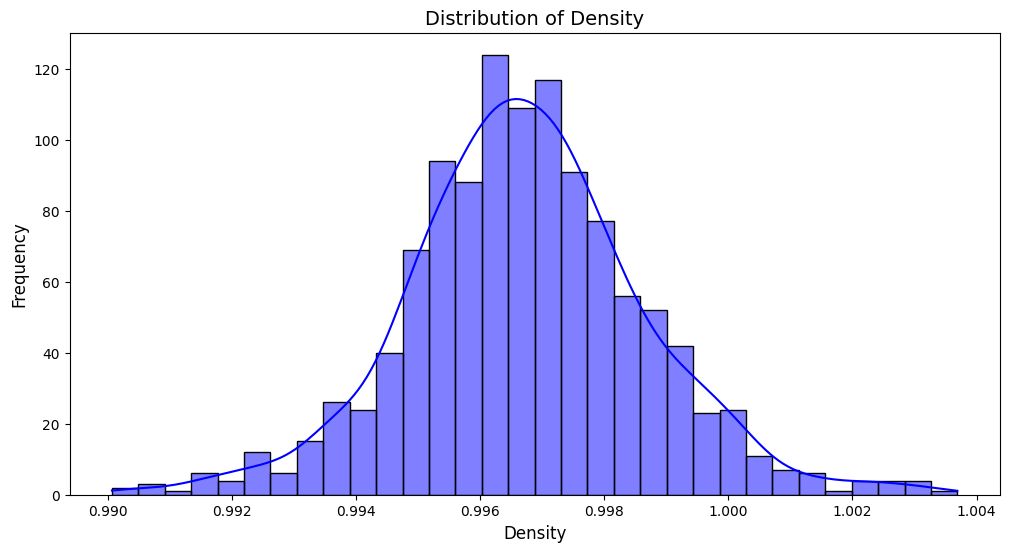

In [8]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='density', kde=True, color='blue')

plt.xlabel('Density', fontsize=12)

plt.ylabel('Frequency', fontsize=12)

plt.title('Distribution of Density', fontsize=14)

plt.show()

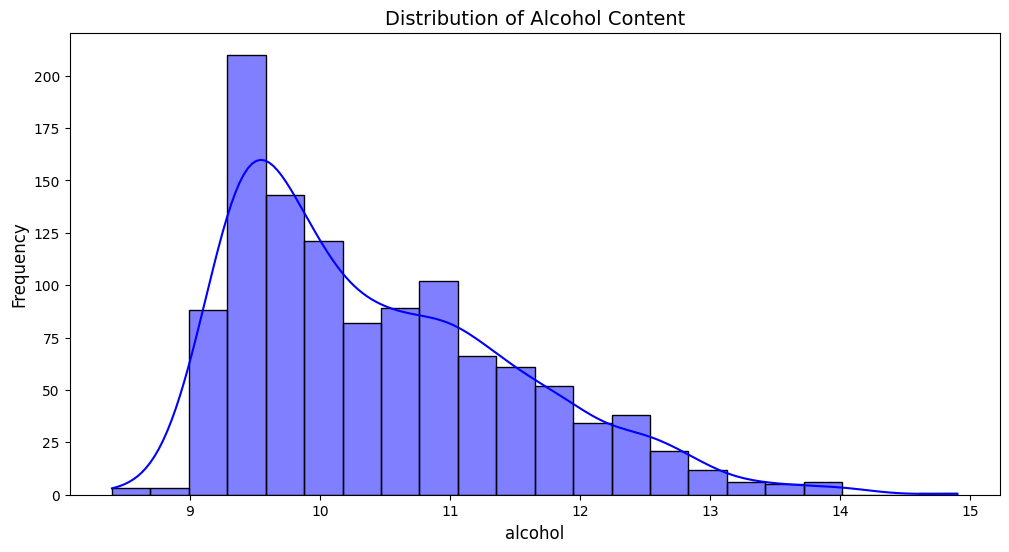

In [9]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='alcohol', kde=True, color='blue')

plt.xlabel('alcohol', fontsize=12)

plt.ylabel('Frequency', fontsize=12)

plt.title('Distribution of Alcohol Content', fontsize=14)

plt.show()

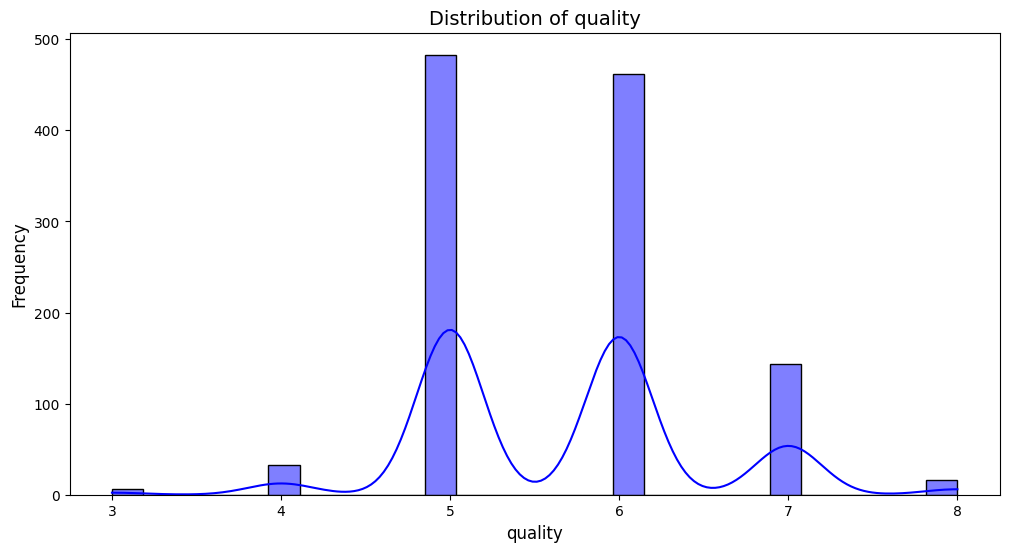

In [10]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='quality', kde=True, color='blue')

plt.xlabel('quality', fontsize=12)

plt.ylabel('Frequency', fontsize=12)

plt.title('Distribution of quality', fontsize=14)

plt.show()

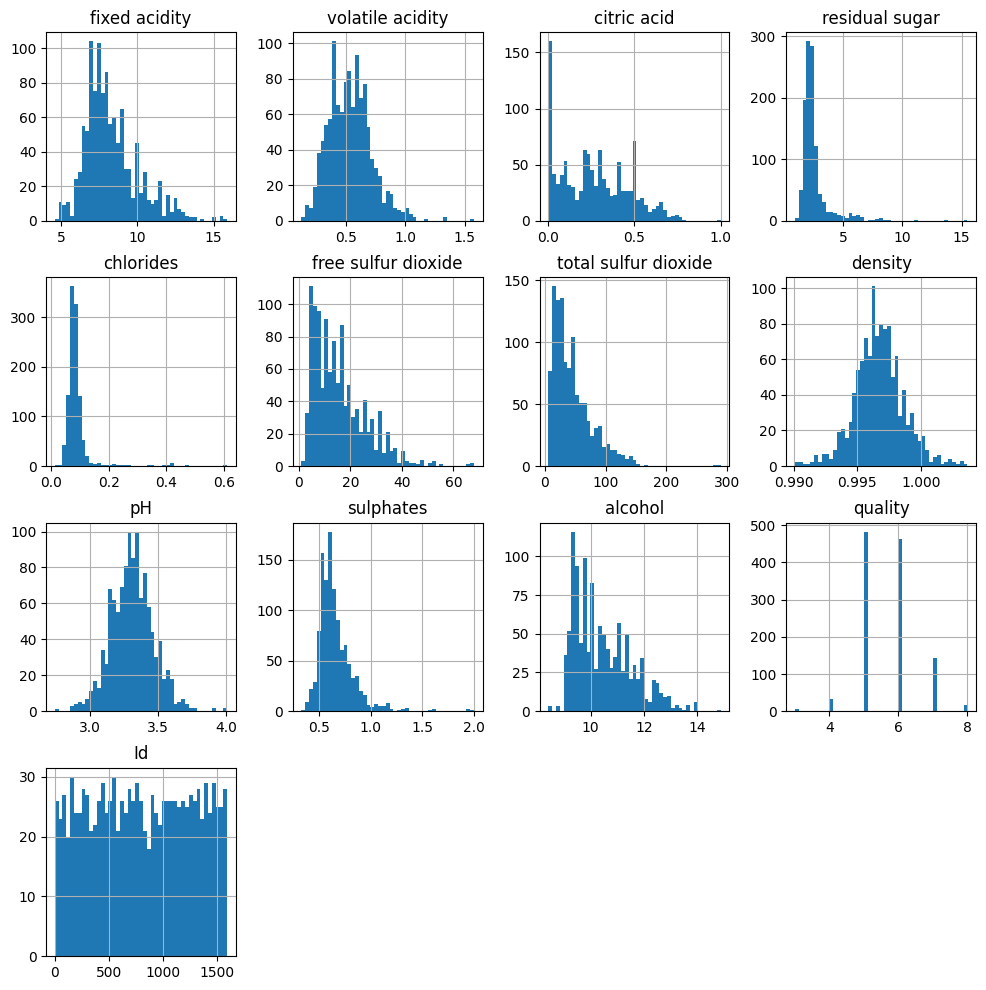

In [11]:
df.hist(figsize=(12,12), bins=45)
plt.show()

Box Plot

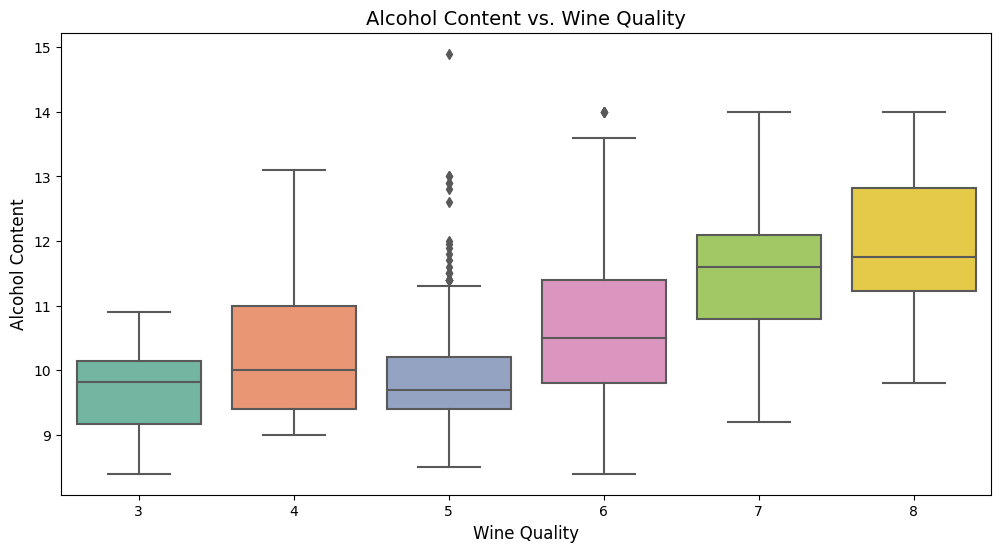

In [12]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='quality', y='alcohol', palette='Set2')

plt.xlabel('Wine Quality', fontsize=12)

plt.ylabel('Alcohol Content', fontsize=12)

plt.title('Alcohol Content vs. Wine Quality', fontsize=14)

plt.show()

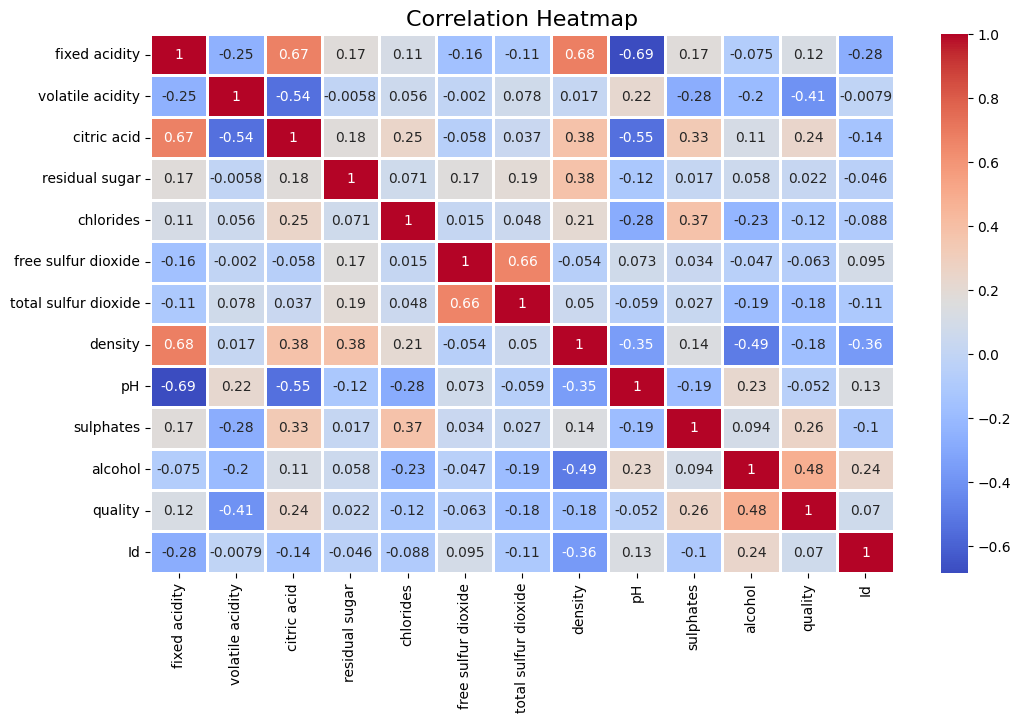

In [13]:
cm = df.corr()

plt.figure(figsize=(12, 7))

sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.8)

plt.title('Correlation Heatmap', fontsize=16)

plt.show()

Using Pair Plots

C:\Users\palug\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

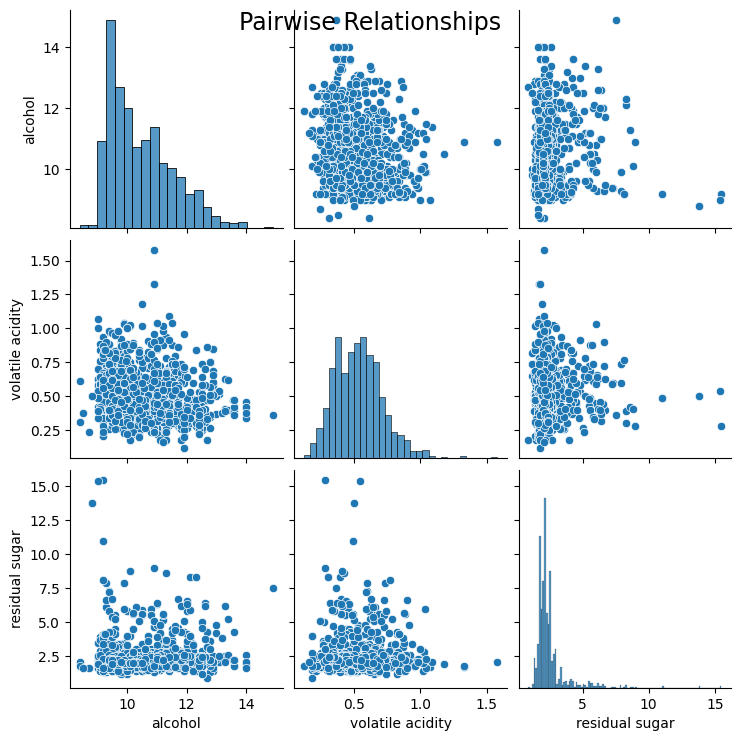

In [14]:
plt.figure(figsize=(14, 8))

pair_plot = sns.pairplot(data=df, vars=['alcohol', 'volatile acidity', 'residual sugar'])


pair_plot.fig.suptitle('Pairwise Relationships', fontsize=17)

plt.show()

With the help of coutplots and Bar Charts

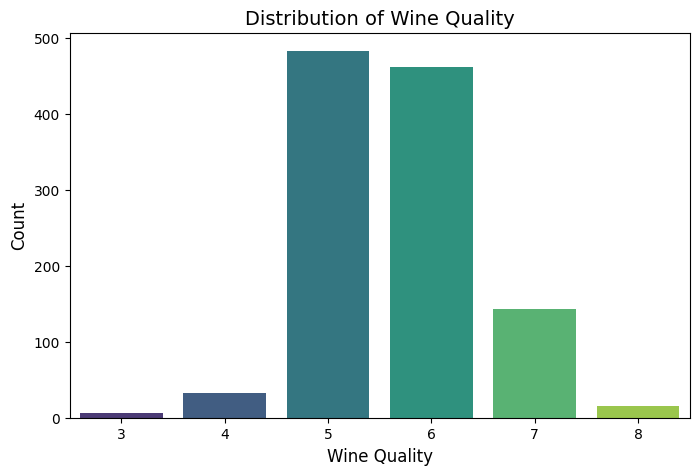

In [15]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='quality', palette='viridis')

plt.xlabel('Wine Quality', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.title('Distribution of Wine Quality', fontsize=14)

plt.show()

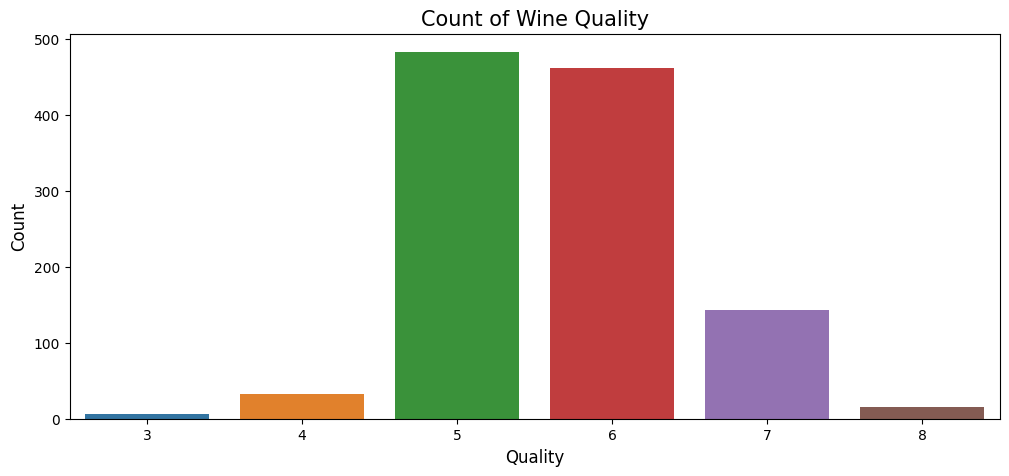

In [16]:
plt.figure(figsize=(12, 5))

sns.countplot(data=df, x='quality')

plt.xlabel('Quality', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.title('Count of Wine Quality', fontsize=15)

plt.show()

In [17]:
bins = (2, 6.5, 8)
classes = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classes)

In [18]:
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

So 0 indicates bad and 1 indicates good

<Axes: ylabel='count'>

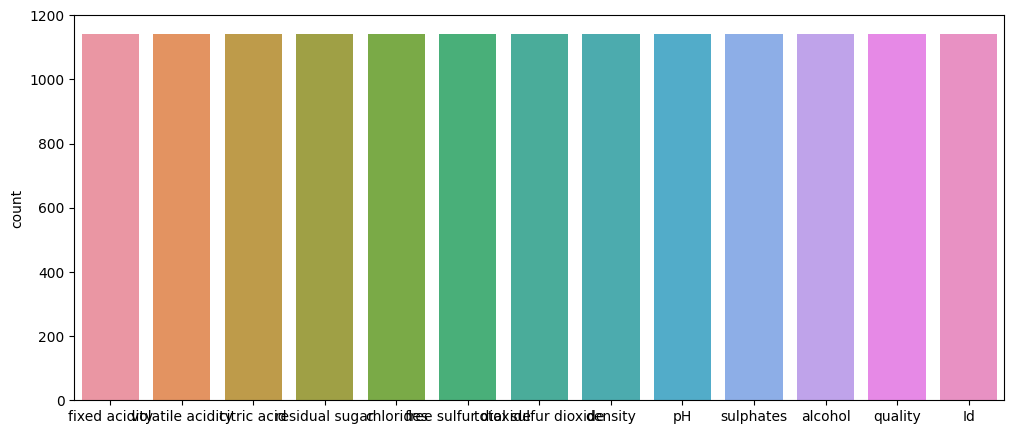

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(df)

Splitting the training and testing data

In [20]:
X=df.drop('quality',axis=1)

y = df['quality']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building the Linear Regression Model:

In [23]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [24]:
y_pred=model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0822012063748388
R-squared: 0.234059441452928
